In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline 

In [2]:
# fix random seed for reproducibility
np.random.seed(7)

In [38]:
data = pd.read_csv('HealtyNormalized.csv')


testdata = pd.read_csv('combinedFault.csv')
data.info() , testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999943 entries, 0 to 1999942
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   vsH     float64
 1   vbH     float64
dtypes: float64(2)
memory usage: 30.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1889257 entries, 0 to 1889256
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   vsC     float64
 1   vbC     float64
dtypes: float64(2)
memory usage: 28.8 MB


(None, None)

In [39]:
data.head() , testdata.head()

(        vsH       vbH
 0  0.000998 -0.000217
 1  0.001001 -0.000185
 2  0.001002 -0.000152
 3  0.001007 -0.000185
 4  0.001010 -0.000217,
         vsC       vbC
 0  0.039634  0.018847
 1  0.039634  0.018847
 2  0.039634  0.018518
 3  3.632150  0.015887
 4  4.148328  0.018518)

In [41]:
vibration = data['vbH']
vibration = pd.DataFrame(vibration)

testvibration = testdata['vbC']
testvibration = pd.DataFrame(testvibration)


vibration.info() , testvibration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999943 entries, 0 to 1999942
Data columns (total 1 columns):
 #   Column  Dtype  
---  ------  -----  
 0   vbH     float64
dtypes: float64(1)
memory usage: 15.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1889257 entries, 0 to 1889256
Data columns (total 1 columns):
 #   Column  Dtype  
---  ------  -----  
 0   vbC     float64
dtypes: float64(1)
memory usage: 14.4 MB


(None, None)

In [42]:
vibration.head(), testvibration.head()

(        vbH
 0 -0.000217
 1 -0.000185
 2 -0.000152
 3 -0.000185
 4 -0.000217,
         vbC
 0  0.018847
 1  0.018847
 2  0.018518
 3  0.015887
 4  0.018518)

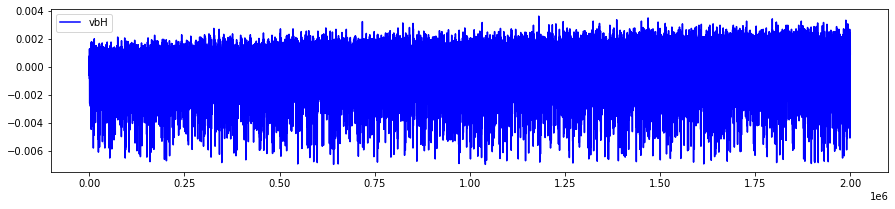

In [7]:
dataset = vibration.plot(color='b',figsize = (15,3))

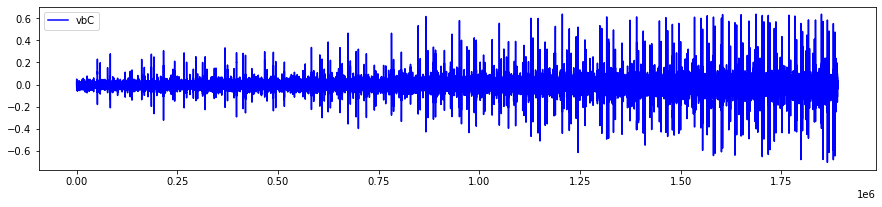

In [43]:
testdataset = testvibration.plot(color='b',figsize = (15,3))

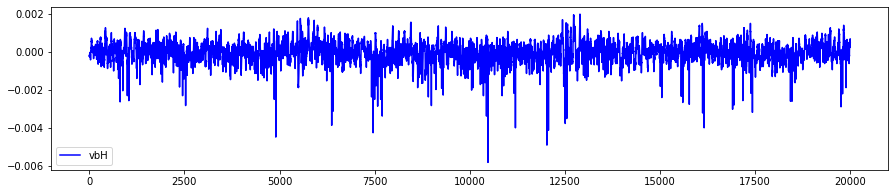

In [23]:
dataset = vibration.iloc[0:20000].plot(color='b',figsize = (15,3))

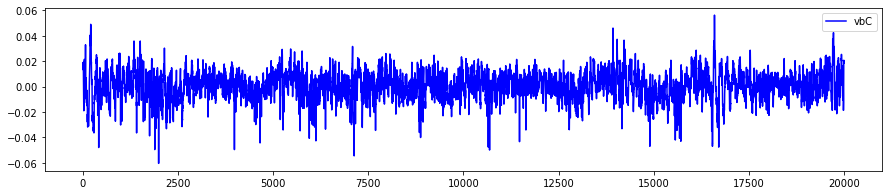

In [45]:
testdataset = testvibration.iloc[0:20000].plot(color='b',figsize = (15,3))

<AxesSubplot:>

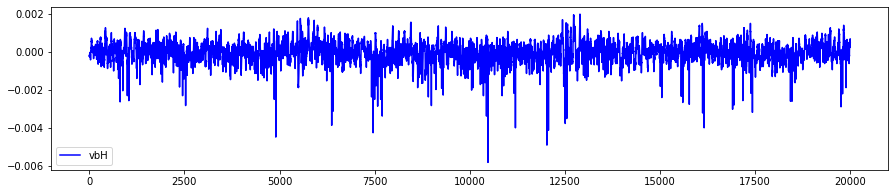

In [24]:
smallDataset = vibration.iloc[0:20000]
smallDataset.plot(color='b',figsize = (15,3))

<AxesSubplot:>

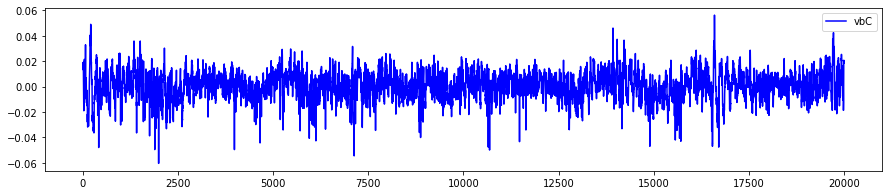

In [46]:
testsmallDataset = testvibration.iloc[0:20000]
testsmallDataset.plot(color='b',figsize = (15,3))

In [47]:
smallDataset.info(), testsmallDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   vbH     20000 non-null  float64
dtypes: float64(1)
memory usage: 156.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   vbC     20000 non-null  float64
dtypes: float64(1)
memory usage: 156.4 KB


(None, None)

In [26]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
normalizedVibration = scaler.fit_transform(smallDataset)
normalizedVibration = pd.DataFrame(normalizedVibration)

In [48]:
# normalize the testdataset
scaler = MinMaxScaler(feature_range=(0, 1))
testnormalizedVibration = scaler.fit_transform(testsmallDataset)
testnormalizedVibration = pd.DataFrame(testnormalizedVibration)

<AxesSubplot:>

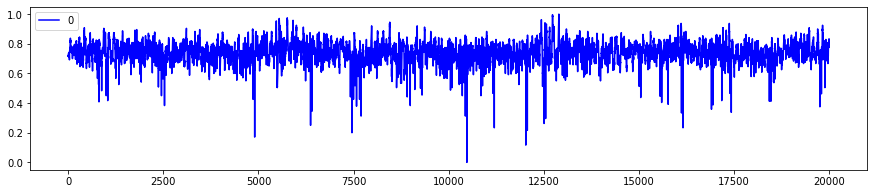

In [27]:
normalizedVibration.plot(color='b',figsize = (15,3))

<AxesSubplot:>

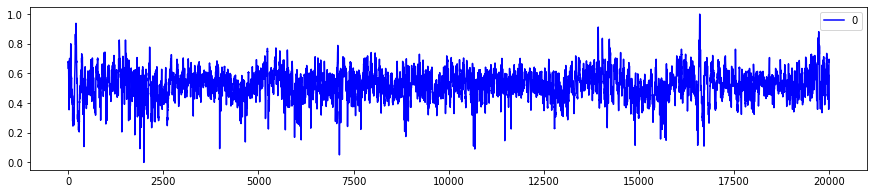

In [49]:
testnormalizedVibration.plot(color='b',figsize = (15,3))

In [28]:
dataset = normalizedVibration
dataset = pd.DataFrame(dataset)
dataset.tail()

,0
19995,0.829167
19996,0.833333
19997,0.795833
19998,0.808333
19999,0.808333


In [50]:
testdataset = testnormalizedVibration
testdataset = pd.DataFrame(testdataset)
testdataset.tail()

,0
19995,0.667606
19996,0.690141
19997,0.695775
19998,0.692958
19999,0.676056


In [29]:
"""
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

print("Total Dataset   = ", len(dataset))
print("Training Smaple = ", train_size)
print("Testing Sample  = ", test_size)

"""

Total Dataset   =  20000
Training Smaple =  13400
Testing Sample  =  6600


In [53]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(testdataset) - train_size
train, test = dataset[0:train_size], testdataset[train_size:len(dataset)]

print("Total Dataset   = ", len(dataset))
print("Training Smaple = ", train_size)
print("Testing Sample  = ", test_size)

Total Dataset   =  20000
Training Smaple =  13400
Testing Sample  =  6600


In [55]:
train

,0
0,0.716667
1,0.720833
2,0.725000
3,0.720833
4,0.716667
...,...
13395,0.687500
13396,0.691667
13397,0.700000
13398,0.708333


In [56]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset.iloc[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset.iloc[i + look_back])
    return np.array(dataX), np.array(dataY)

In [57]:
test[0].iloc[1:6]

13401    0.566197
13402    0.554930
13403    0.574648
13404    0.600000
13405    0.614084
Name: 0, dtype: float64

In [58]:
test[0].describe()

count    6600.000000
mean        0.535212
std         0.093497
min         0.109859
25%         0.476056
50%         0.535211
75%         0.594366
max         1.000000
Name: 0, dtype: float64

In [59]:
# reshape into X=t and Y=t+1
look_back = 20
trainX, trainY = create_dataset(train[0], look_back)
testX, testY   = create_dataset(test[0], look_back)

In [60]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [61]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
13379/13379 - 7s - loss: 0.0289
Epoch 2/20
13379/13379 - 7s - loss: 0.0205
Epoch 3/20
13379/13379 - 7s - loss: 0.0192
Epoch 4/20
13379/13379 - 7s - loss: 0.0186
Epoch 5/20
13379/13379 - 7s - loss: 0.0182
Epoch 6/20
13379/13379 - 7s - loss: 0.0182
Epoch 7/20
13379/13379 - 7s - loss: 0.0180
Epoch 8/20
13379/13379 - 7s - loss: 0.0177
Epoch 9/20
13379/13379 - 7s - loss: 0.0176
Epoch 10/20
13379/13379 - 7s - loss: 0.0174
Epoch 11/20
13379/13379 - 8s - loss: 0.0174
Epoch 12/20
13379/13379 - 8s - loss: 0.0173
Epoch 13/20
13379/13379 - 8s - loss: 0.0174
Epoch 14/20
13379/13379 - 7s - loss: 0.0171
Epoch 15/20
13379/13379 - 8s - loss: 0.0170
Epoch 16/20
13379/13379 - 8s - loss: 0.0171
Epoch 17/20
13379/13379 - 8s - loss: 0.0171
Epoch 18/20
13379/13379 - 7s - loss: 0.0169
Epoch 19/20
13379/13379 - 8s - loss: 0.0168
Epoch 20/20
13379/13379 - 7s - loss: 0.0169


In [62]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate mean_absolute_error
print('Train Score: MAE',mean_absolute_error(trainY[0], trainPredict[:,0]))
print('Test Score: MAE',mean_absolute_error(testY[0], testPredict[:,0]))

Train Score: MAE 0.0018612151906998097
Test Score: MAE 0.0035989954582964986


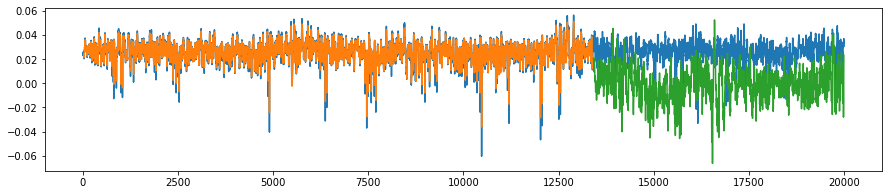

In [63]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(15, 3))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()